### Take in a camera (warped) image and output the undistorted image with chessboard corners drawn on it. Given that the input is a chessboard, this makes good sense.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

find corners, calibrate your camera, undistort an image, and apply a perspective transform

#Find Corners

here lucas
[[ 437.  114.]
 [1104.  225.]
 [ 465.  769.]
 [1076.  658.]]
[[ 137.   64.]
 [1176.   64.]
 [ 137.  869.]
 [1176.  869.]]


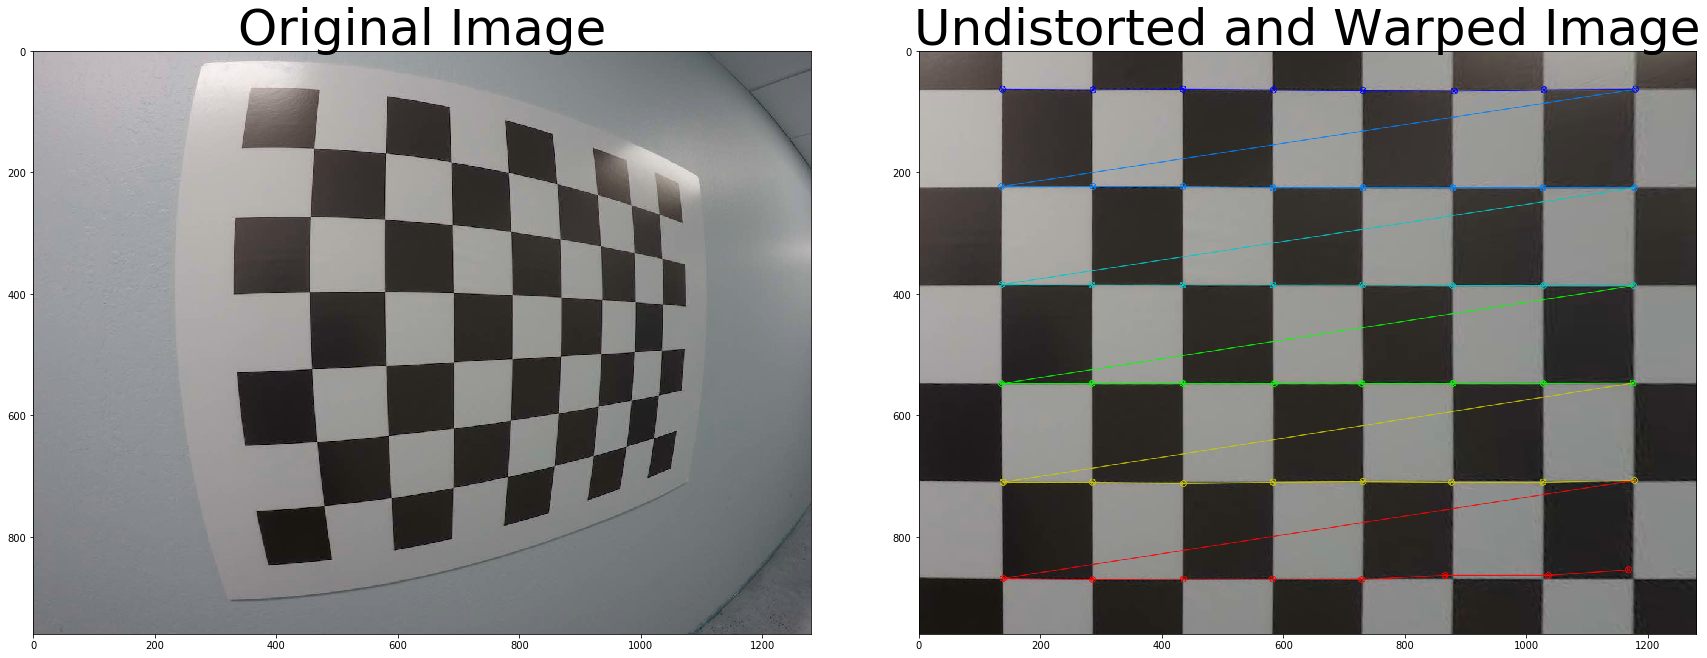

In [84]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from copy import deepcopy

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y


# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    new_img = np.copy( img )
    
    #bear in mind that undistort takes camera calibration data
    # from a call to cv2.calibrateCamera which uses a similar 
    # pictures at many different angles (at best)
    new_img = cv2.undistort(new_img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
    
    imgpoints = []
    objpoints = []
    
    '''
    print(len(corners), len(corners[0]), type(corners[0]) )
    print(corners[0][0])
    print(corners)
    '''
    
    if ret == True:
        #imgpoints.append(corners)
        #objpoints.append(objp)
        #print("lucas")
        
        src = np.float32( [corners[0][0], corners[7][0], corners[40][0], corners[47][0] ] )
        
        dst = np.float32([ [corners[0][0][0]-300,corners[0][0][1]-50], 
                        [ corners[47][0][0]+100, corners[0][0][1]-50 ], 
                        [ corners[0][0][0]-300,corners[40][0][1] +100 ], 
                        [ corners[47][0][0]+100, corners[40][0][1] +100]
                        ])
        src = np.float32([[int(round(k)) for k in i ] for i in src])    
        dst = np.float32([[int(round(k)) for k in i ] for i in dst])
                
        M = cv2.getPerspectiveTransform(src,dst)
        img_size = (gray.shape[1], gray.shape[0])
        unwarped = cv2.warpPerspective(new_img, M, img_size, flags=cv2.INTER_LINEAR)
        
        ret2, corners2 = cv2.findChessboardCorners(unwarped, (8,6),None)
        if ret2 == True:
            print('here lucas')
            unwarped = cv2.drawChessboardCorners(unwarped, (8,6), corners2, ret2)
        print(src)
        print(dst)
        return img,unwarped
        
    return None
        
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view

#for i in src:
#   plt.plot(i[0],i[1],'.')

img_1, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_1)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(perspective_M,cmap='gray')
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)